# 03 - Introduction to Pillow & Image Fundamentals

[Pillow](https://pillow.readthedocs.io/en/stable/) is an open-source Python Imaging Library that adds powerful image processing capabilities to Python. It is the modern, actively maintained fork of the original Python Imaging Library (PIL).

This notebook covers two main topics:

1. **What is an image?** – Understanding images as data (pixels, resolution, RGB vs grayscale)
2. **Practical image manipulation with Pillow** – Loading, displaying, transforming, and enhancing images

You will learn basic operations like rotating, cropping, and resizing images, as well as adjusting properties like brightness, contrast, color, and sharpness.

> **Note:** This notebook consolidates content originally planned for a separate "What is an image?" notebook, providing a cohesive introduction to both image fundamentals and the Pillow library.

## Installation and Setup

First, let's install and import the necessary libraries.

In [1]:
# Install Pillow if not already available
# This is mainly for environments like Google Colab or fresh local Python installations
# In managed environments (JupyterHub, conda environments), Pillow may already be installed
!pip install Pillow

In [2]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for inline display
%matplotlib inline

## Image Object in Pillow

Images in Pillow are represented as `Image` objects. These objects provide attributes and methods for accessing image data and performing operations.

Let's load a sample image and explore its properties.

In [3]:
# Load an image from the local images folder
image = Image.open("../images/pillow_sample.png")

print("Image loaded successfully!")

Image loaded successfully!


### Key Attributes of an Image Object

An `Image` object has several important attributes:

- **`format`**: The format of the source file (e.g., PNG, JPEG, BMP)
- **`size`**: A tuple (width, height) representing the image dimensions in pixels
- **`mode`**: The pixel format and depth:
  - `'L'` for grayscale (8-bit pixels)
  - `'RGB'` for true color (3 × 8-bit pixels)
  - `'RGBA'` for true color with transparency
  - `'CMYK'` for pre-press images
- **`info`**: A dictionary containing metadata (e.g., DPI, EXIF data)

In [4]:
print('Format:', image.format)
print('Size:', image.size, '(width × height in pixels)')
print('Mode:', image.mode)
print('Info:', image.info)

Format: PNG
Size: (512, 512) (width × height in pixels)
Mode: RGB
Info: {}


### Converting Between Pillow and NumPy

Pillow images can be easily converted to NumPy arrays and vice versa. This is useful for numerical operations and integration with machine learning frameworks.

In [5]:
# Convert the Pillow image to a NumPy array
image_array = np.array(image)

# Display the shape: (height, width, channels)
print('Array shape:', image_array.shape)
print('Data type:', image_array.dtype)
print('Value range:', image_array.min(), 'to', image_array.max())

Array shape: (512, 512, 3)
Data type: uint8
Value range: 0 to 255


In [6]:
# View a small portion of the array (top-left 3×3 pixels)
print('Top-left 3×3 pixels (RGB values):')
print(image_array[:3, :3, :])

Top-left 3×3 pixels (RGB values):
[[[  0   0 128]
  [  0   0 129]
  [  0   0 131]]

 [[  0   0 128]
  [  0   0 129]
  [  0   0 131]]

 [[  0   0 128]
  [  0   0 129]
  [  0   0 131]]]


In [7]:
# Convert the NumPy array back to a Pillow Image object
new_image = Image.fromarray(image_array)
print('Successfully converted back to Pillow Image')
print('New image size:', new_image.size)

Successfully converted back to Pillow Image
New image size: (512, 512)


## Displaying Images

There are two common ways to display images in Python:

1. **Pillow's `.show()` method**: Opens the image in your system's default image viewer
2. **Matplotlib**: Displays the image inline in Jupyter notebooks (recommended for interactive work)

In [8]:
# Option 1: Using Pillow's show() method
# Uncomment the line below to open the image in your system's default viewer
# image.show()

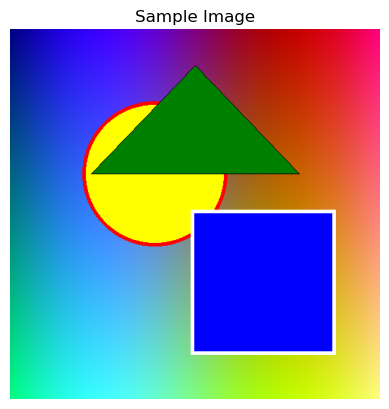

In [9]:
# Option 2: Using Matplotlib (recommended for notebooks)
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and labels
plt.title('Sample Image')
plt.show()

## RGB Images and Grayscale Conversion

### Understanding RGB Images

An RGB image is composed of three color channels: **Red**, **Green**, and **Blue**. Each pixel has three values (typically 0-255) representing the intensity of each color.

Let's split the image into its individual color channels and visualize them.

In [10]:
# Split the image into R, G, B channels
r, g, b = image.split()

print('Image mode:', image.mode)
print('Each channel is a grayscale image with mode:', r.mode)

Image mode: RGB
Each channel is a grayscale image with mode: L


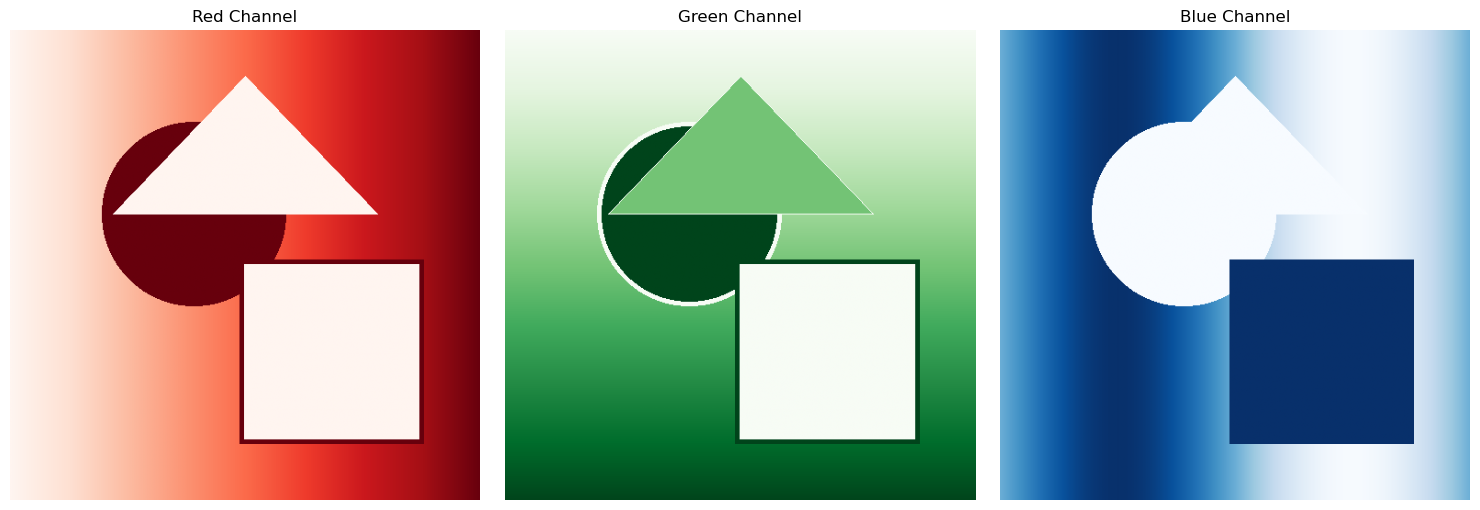

In [11]:
# Visualize the three color channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(r, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(b, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.tight_layout()
plt.show()

**What we observe:**

- The **red channel** shows bright values where red color is prominent
- The **green channel** highlights areas with green tones
- The **blue channel** emphasizes blue regions
- Brighter pixels in each channel indicate higher intensity of that color component

### Converting to Grayscale

Grayscale images contain only shades of gray (no color information). Each pixel is represented by a single value indicating luminance (light intensity) from 0 (black) to 255 (white).

The conversion uses a weighted sum of RGB components:

$$\text{Gray} = 0.299 \times R + 0.587 \times G + 0.114 \times B$$

These weights approximate human perception, where we are most sensitive to green light.

In [12]:
# Convert to grayscale using Pillow's convert method
gray_image = image.convert('L')

print('Original mode:', image.mode)
print('Grayscale mode:', gray_image.mode)
print('Original size:', image.size)
print('Grayscale size:', gray_image.size)

Original mode: RGB
Grayscale mode: L
Original size: (512, 512)
Grayscale size: (512, 512)


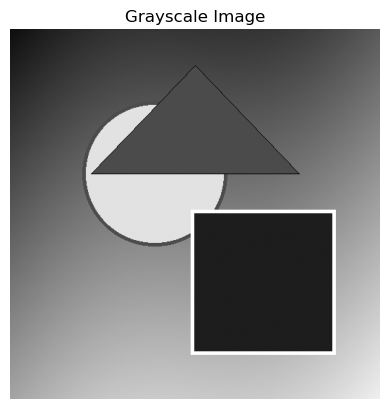

In [13]:
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

## Basic Image Manipulation

Pillow provides various methods for basic image transformations. These operations are essential for data preprocessing, augmentation, and computer vision tasks.

### Transposing and Flipping

The `.transpose()` method allows flipping and rotating images. Common operations include:

- `Image.FLIP_LEFT_RIGHT`: Horizontal flip (mirror)
- `Image.FLIP_TOP_BOTTOM`: Vertical flip
- `Image.ROTATE_90`: Rotate 90° counterclockwise
- `Image.ROTATE_180`: Rotate 180°
- `Image.ROTATE_270`: Rotate 270° counterclockwise (90° clockwise)
- `Image.TRANSPOSE`: Transpose (flip over main diagonal)
- `Image.TRANSVERSE`: Transverse (flip over secondary diagonal)

**When are these useful?**
- Data augmentation in machine learning to increase dataset diversity
- Correcting image orientation
- Creating symmetrical patterns

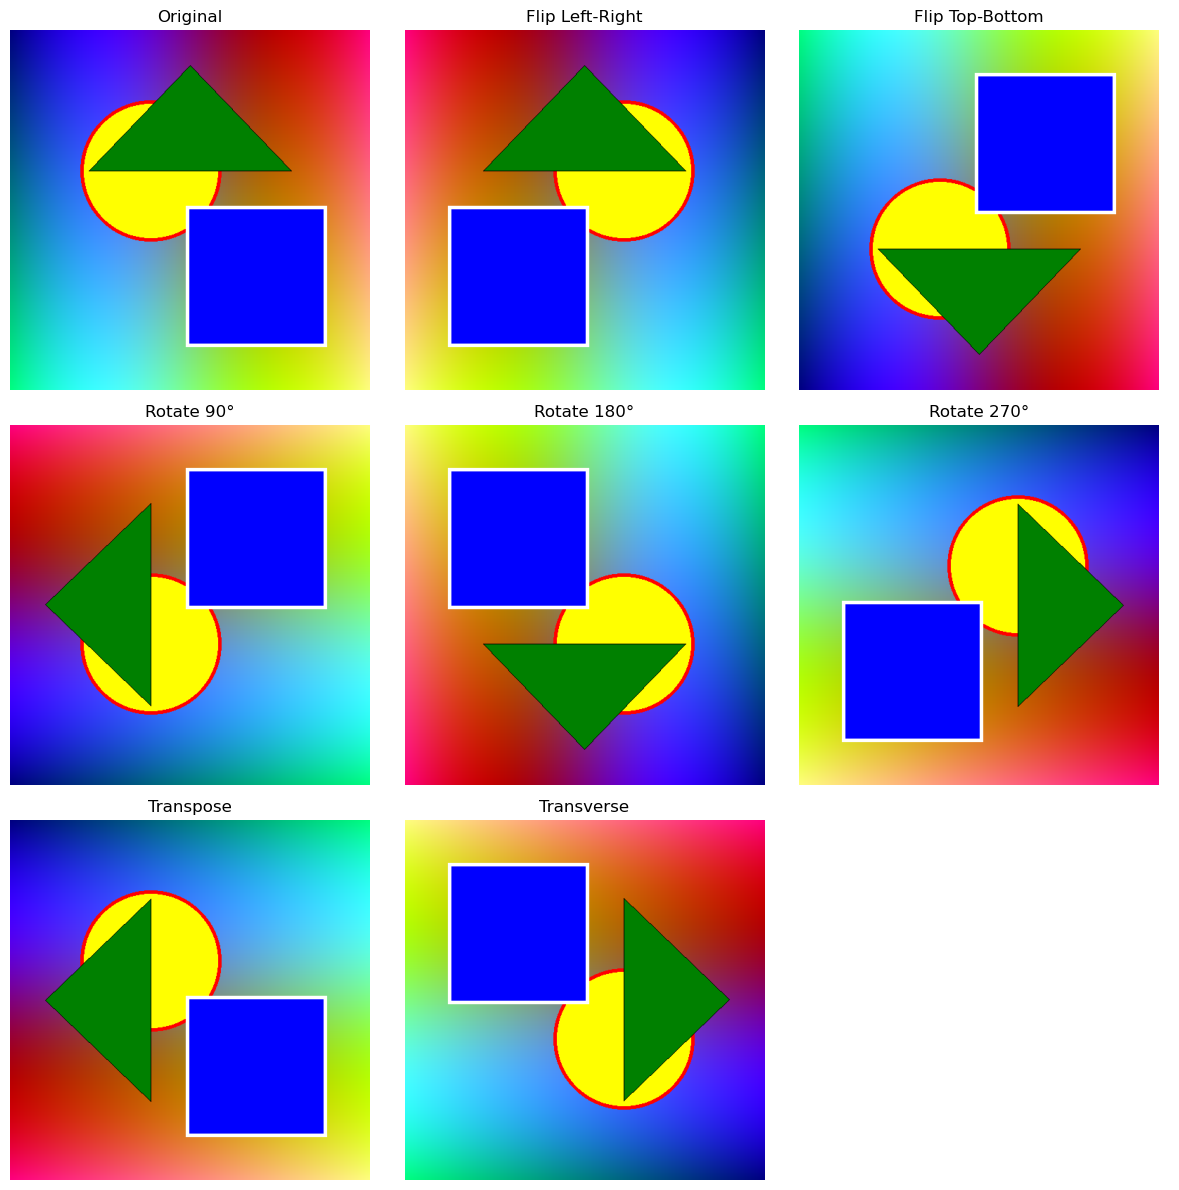

In [14]:
# Apply different transpositions and rotations
flipped_lr = image.transpose(Image.FLIP_LEFT_RIGHT)
flipped_tb = image.transpose(Image.FLIP_TOP_BOTTOM)
rotated_90 = image.transpose(Image.ROTATE_90)
rotated_180 = image.transpose(Image.ROTATE_180)
rotated_270 = image.transpose(Image.ROTATE_270)
transposed = image.transpose(Image.TRANSPOSE)
transversed = image.transpose(Image.TRANSVERSE)

# Visualize all transformations
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0, 0].imshow(image)
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

axs[0, 1].imshow(flipped_lr)
axs[0, 1].set_title("Flip Left-Right")
axs[0, 1].axis('off')

axs[0, 2].imshow(flipped_tb)
axs[0, 2].set_title("Flip Top-Bottom")
axs[0, 2].axis('off')

axs[1, 0].imshow(rotated_90)
axs[1, 0].set_title("Rotate 90°")
axs[1, 0].axis('off')

axs[1, 1].imshow(rotated_180)
axs[1, 1].set_title("Rotate 180°")
axs[1, 1].axis('off')

axs[1, 2].imshow(rotated_270)
axs[1, 2].set_title("Rotate 270°")
axs[1, 2].axis('off')

axs[2, 0].imshow(transposed)
axs[2, 0].set_title("Transpose")
axs[2, 0].axis('off')

axs[2, 1].imshow(transversed)
axs[2, 1].set_title("Transverse")
axs[2, 1].axis('off')

axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

### Rotating by Arbitrary Angles

The `.rotate()` method allows rotation by any angle (in degrees, counterclockwise).

**Practical uses:**
- Correcting tilted images
- Data augmentation with various rotation angles

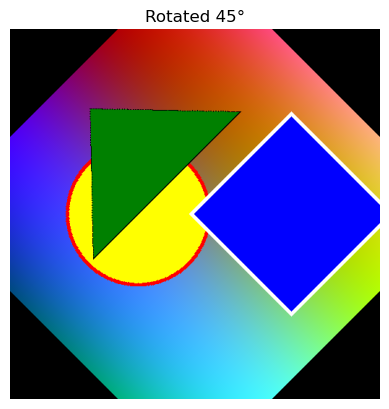

In [15]:
# Rotate by 45 degrees
rotated_image = image.rotate(45)

plt.imshow(rotated_image)
plt.axis('off')
plt.title('Rotated 45°')
plt.show()

### Cropping an Image

The `.crop()` method extracts a rectangular region from an image. It takes a tuple `(left, upper, right, lower)` defining the box coordinates:

- `left`: x-coordinate of the left edge
- `upper`: y-coordinate of the top edge
- `right`: x-coordinate of the right edge
- `lower`: y-coordinate of the bottom edge

Coordinates are relative to the top-left corner (0, 0).

**Practical uses:**
- Extracting regions of interest
- Removing unwanted borders
- Preparing images for models that require specific input sizes

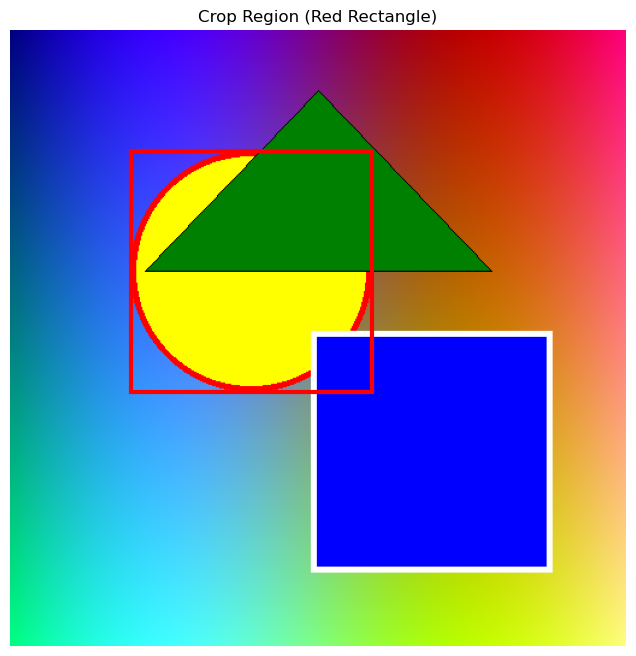

In [16]:
import matplotlib.patches as patches

# Define the crop region
crop_box = (100, 100, 300, 300)

# Visualize the crop region on the original image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)

# Draw a red rectangle showing the crop region
rect = patches.Rectangle(
    (crop_box[0], crop_box[1]), 
    crop_box[2] - crop_box[0], 
    crop_box[3] - crop_box[1], 
    linewidth=3, 
    edgecolor='red', 
    facecolor='none'
)
ax.add_patch(rect)
ax.set_title('Crop Region (Red Rectangle)')
ax.axis('off')
plt.show()

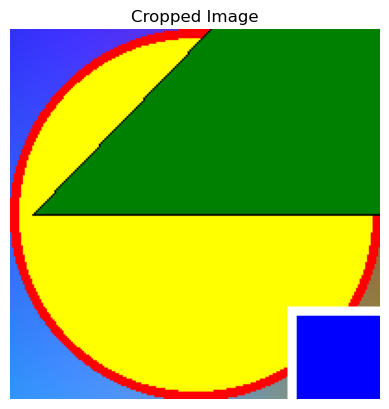

Original size: (512, 512)
Cropped size: (200, 200)


In [17]:
# Perform the crop
cropped_image = image.crop(crop_box)

# Display the cropped result
plt.imshow(cropped_image)
plt.axis('off')
plt.title('Cropped Image')
plt.show()

print(f'Original size: {image.size}')
print(f'Cropped size: {cropped_image.size}')

### Resizing an Image

The `.resize()` method changes the image dimensions. It accepts:

1. **size**: A tuple `(width, height)` for the new dimensions
2. **resample** (optional): The resampling filter, which affects quality:
   - `Image.NEAREST`: Fastest, lowest quality (nearest neighbor)
   - `Image.BILINEAR`: Linear interpolation
   - `Image.BICUBIC`: Cubic interpolation (better quality)
   - `Image.LANCZOS`: Highest quality, best for downsampling

**Practical uses:**
- Preparing images for neural networks (fixed input size)
- Creating thumbnails
- Reducing computational requirements

In [18]:
# Resize to 200×200 using LANCZOS (high quality)
resized_image = image.resize((200, 200), Image.LANCZOS)

print(f'Original size: {image.size}')
print(f'Resized size: {resized_image.size}')

Original size: (512, 512)
Resized size: (200, 200)


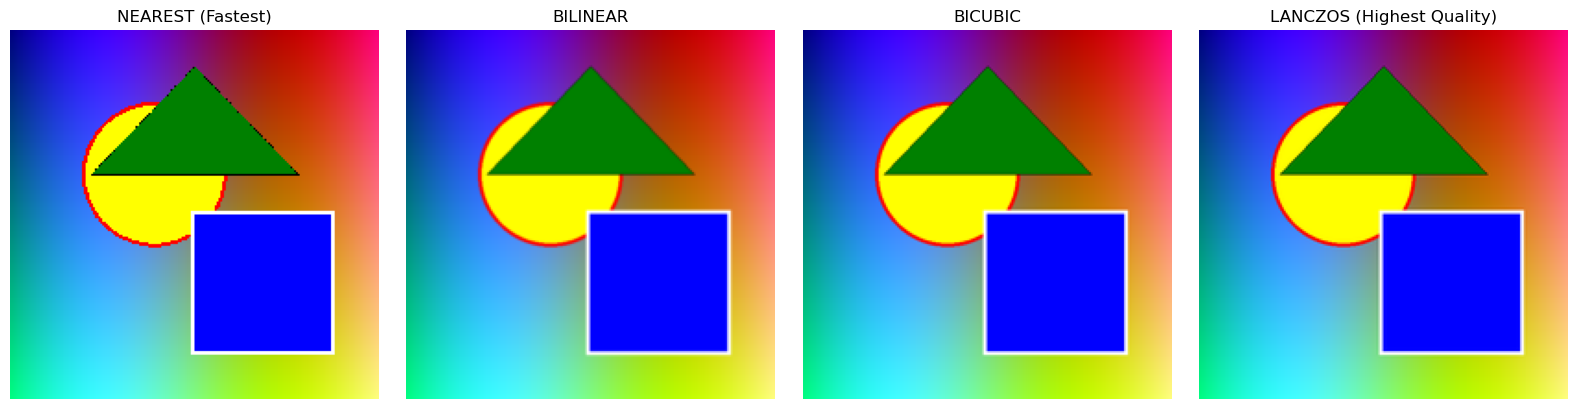

In [19]:
# Compare different resampling methods
nearest = image.resize((200, 200), Image.NEAREST)
bilinear = image.resize((200, 200), Image.BILINEAR)
bicubic = image.resize((200, 200), Image.BICUBIC)
lanczos = image.resize((200, 200), Image.LANCZOS)

# Visualize the differences
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(nearest)
axes[0].set_title("NEAREST (Fastest)")
axes[0].axis('off')

axes[1].imshow(bilinear)
axes[1].set_title("BILINEAR")
axes[1].axis('off')

axes[2].imshow(bicubic)
axes[2].set_title("BICUBIC")
axes[2].axis('off')

axes[3].imshow(lanczos)
axes[3].set_title("LANCZOS (Highest Quality)")
axes[3].axis('off')

plt.tight_layout()
plt.show()

### Example: Combining Operations

Let's combine multiple operations in sequence. For instance, we can crop a region and then resize it back to the original size.

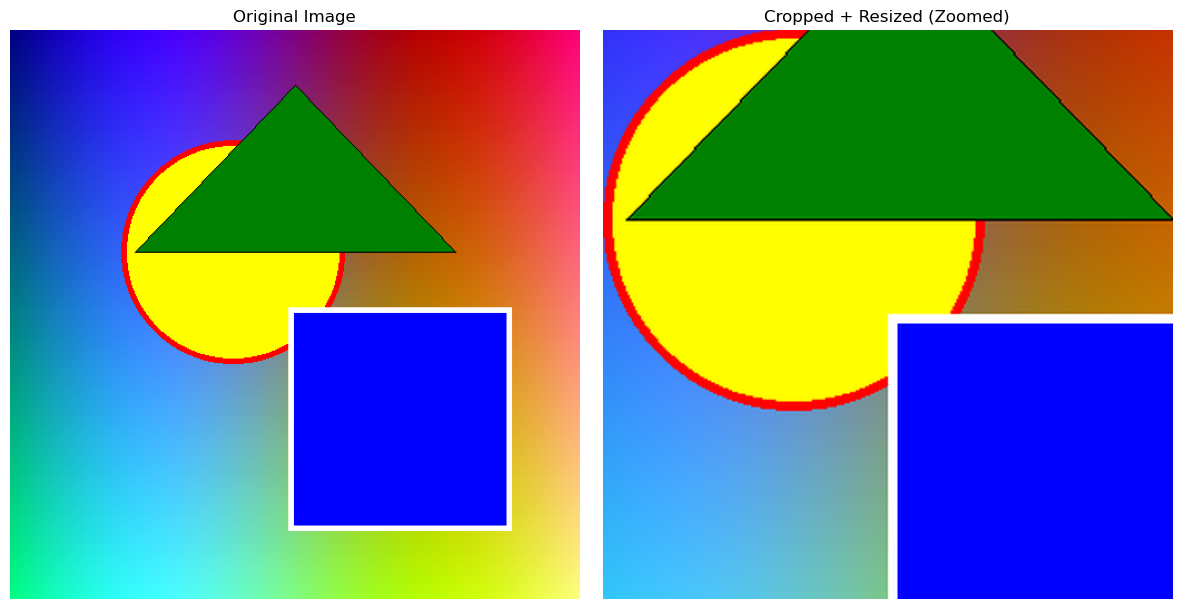

In [20]:
# Save the original size
original_size = image.size

# Crop a region
crop_box = (100, 100, 400, 400)
cropped = image.crop(crop_box)

# Resize back to original dimensions (zooms in on the cropped region)
zoomed_image = cropped.resize(original_size, Image.LANCZOS)

# Display side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(zoomed_image)
axes[1].set_title('Cropped + Resized (Zoomed)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Image Enhancements

The `ImageEnhance` module in Pillow provides methods for adjusting common image properties like brightness, contrast, color saturation, and sharpness. These adjustments are useful for image preprocessing and correction.

### Contrast Enhancement

Contrast refers to the difference between light and dark areas in an image. High contrast images have distinct differences, while low contrast images appear washed out.

**Factor interpretation:**
- Factor > 1: increases contrast
- Factor = 1: no change
- Factor < 1: decreases contrast
- Factor = 0: produces a gray image

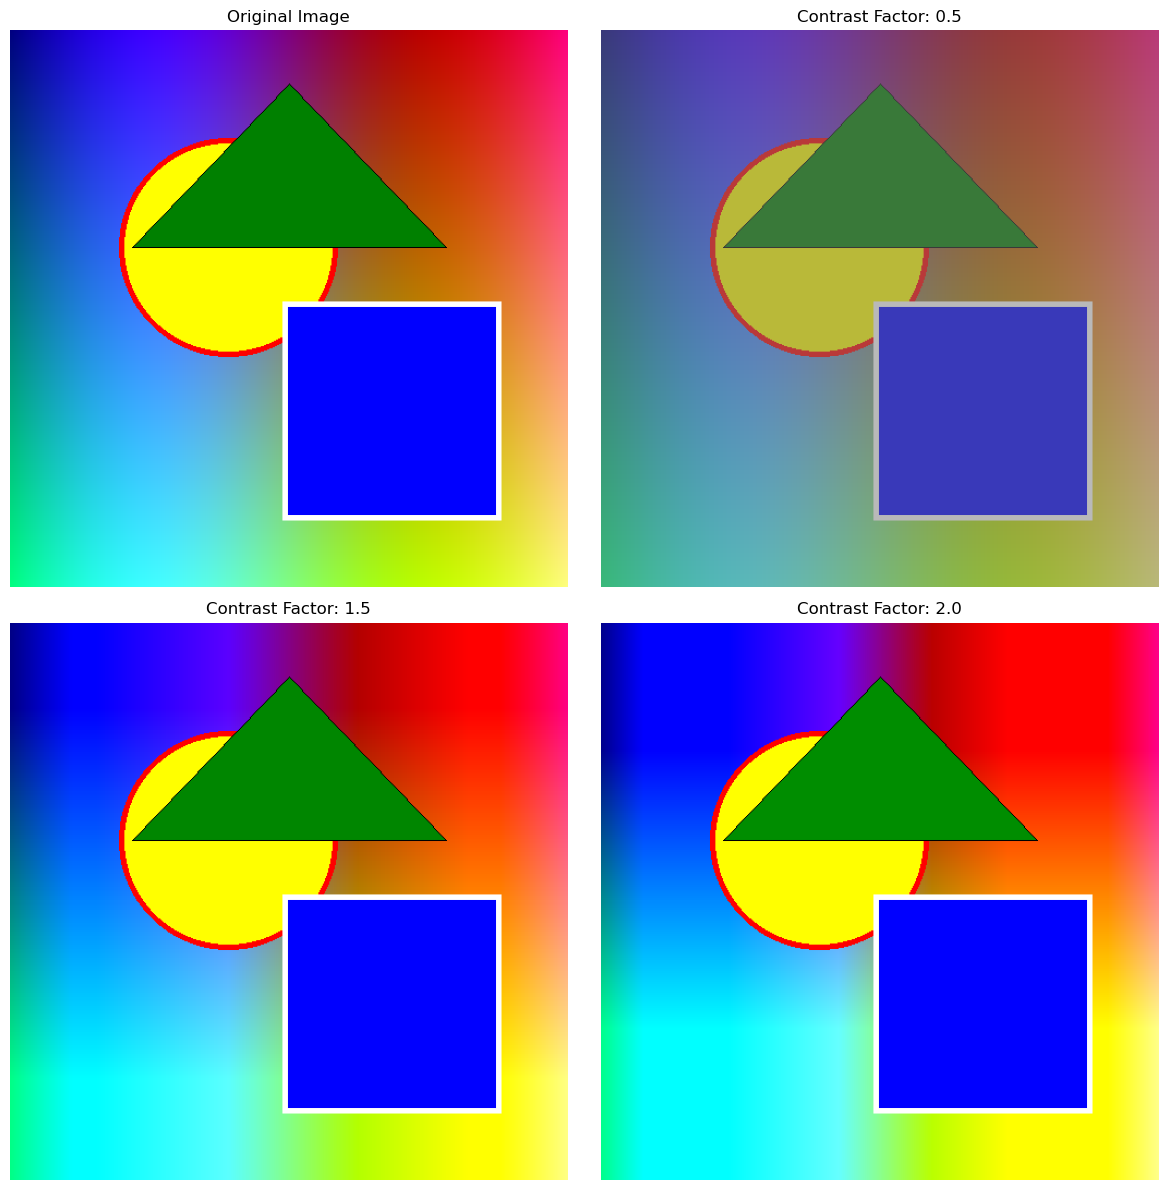

In [21]:
# Demonstrate contrast enhancement
contrast_factors = [0.5, 1.5, 2.0]
contrast_images = [ImageEnhance.Contrast(image).enhance(factor) for factor in contrast_factors]

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, (contrast_image, factor) in enumerate(zip(contrast_images, contrast_factors)):
    row = (i + 1) // 2
    col = (i + 1) % 2
    axes[row, col].imshow(contrast_image)
    axes[row, col].set_title(f'Contrast Factor: {factor}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Brightness Enhancement

Brightness controls the overall light intensity of an image.

**Factor interpretation:**
- Factor > 1: brightens the image
- Factor = 1: no change
- Factor < 1: darkens the image
- Factor = 0: produces a black image

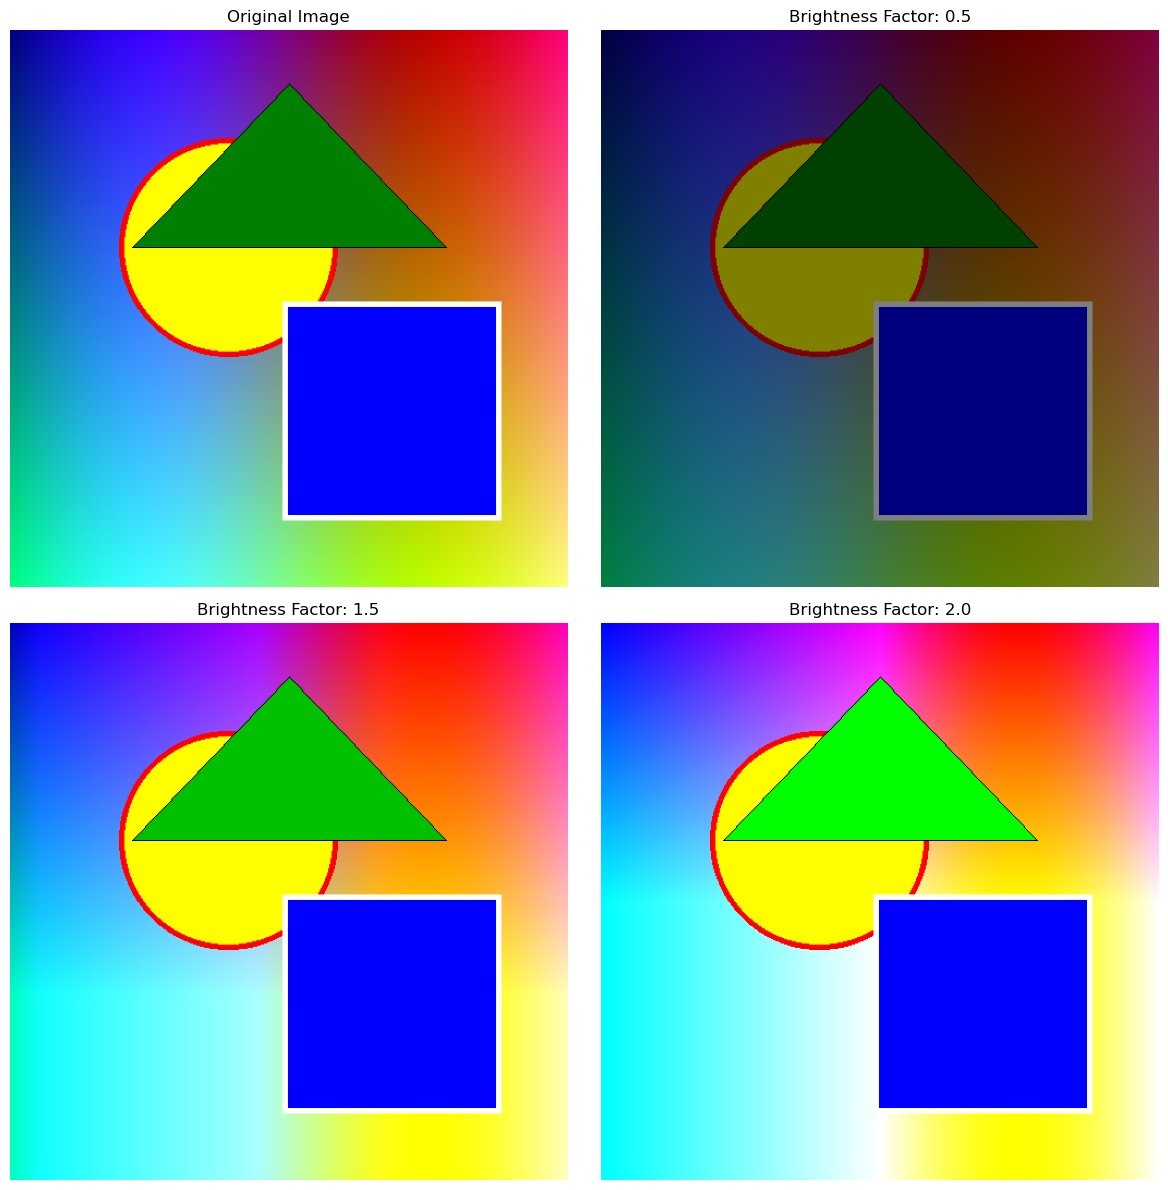

In [22]:
# Demonstrate brightness enhancement
bright_factors = [0.5, 1.5, 2.0]
bright_images = [ImageEnhance.Brightness(image).enhance(factor) for factor in bright_factors]

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, (bright_image, factor) in enumerate(zip(bright_images, bright_factors)):
    row = (i + 1) // 2
    col = (i + 1) % 2
    axes[row, col].imshow(bright_image)
    axes[row, col].set_title(f'Brightness Factor: {factor}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Color Balance Enhancement

Color balance adjusts the intensity and tone of colors in the image.

**Factor interpretation:**
- Factor = 0: produces a black and white image
- Factor < 1: reduces color saturation
- Factor = 1: no change
- Factor > 1: increases color saturation

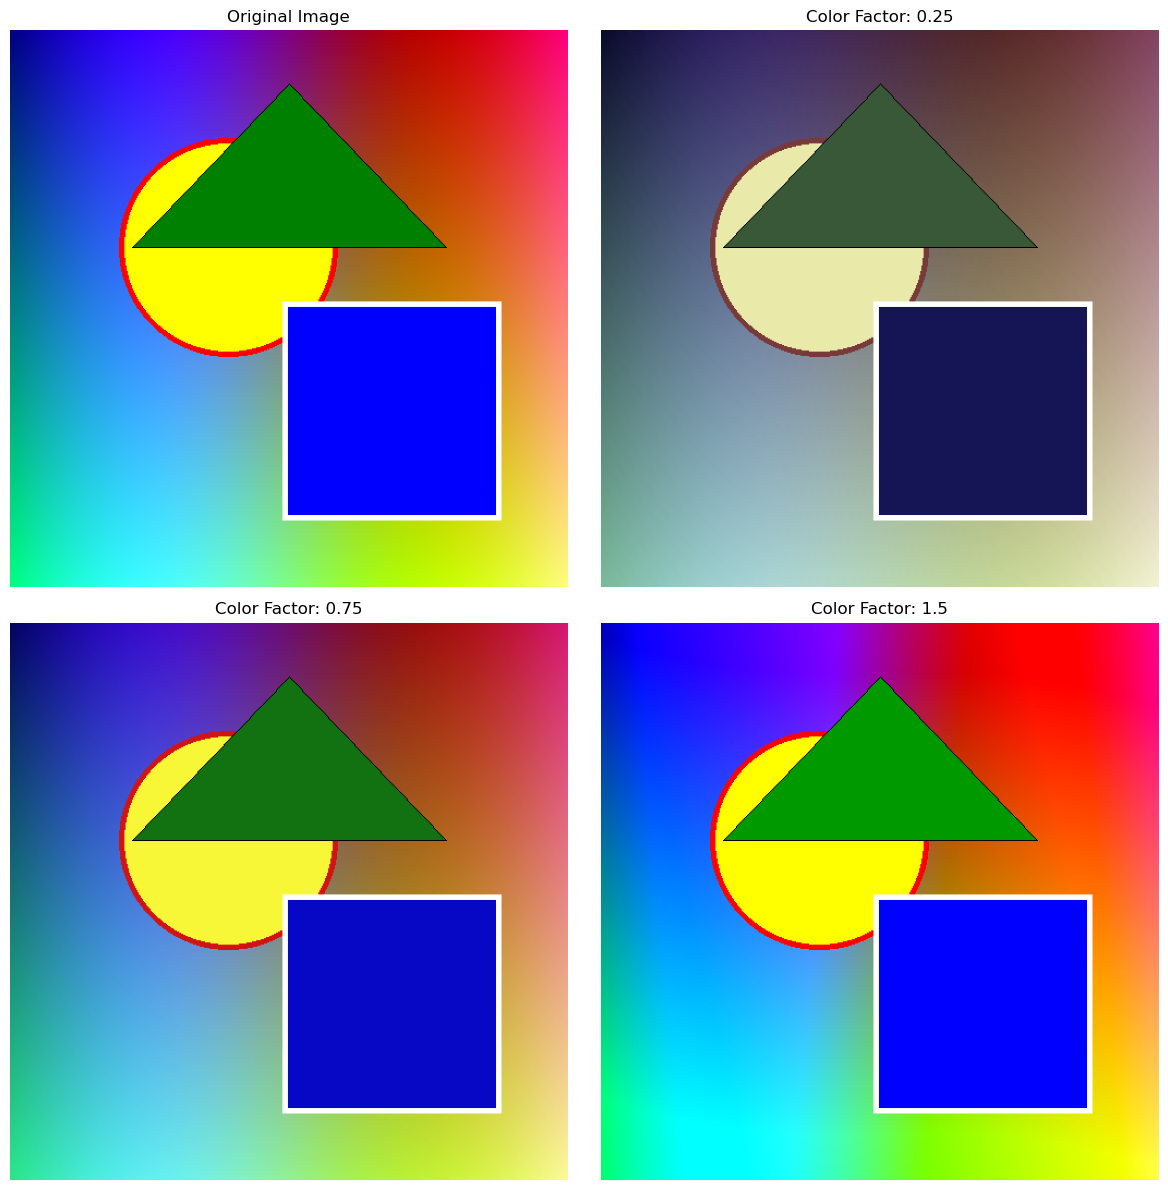

In [23]:
# Demonstrate color enhancement
color_factors = [0.25, 0.75, 1.5]
color_images = [ImageEnhance.Color(image).enhance(factor) for factor in color_factors]

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, (color_image, factor) in enumerate(zip(color_images, color_factors)):
    row = (i + 1) // 2
    col = (i + 1) % 2
    axes[row, col].imshow(color_image)
    axes[row, col].set_title(f'Color Factor: {factor}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Sharpness Enhancement

Sharpness enhancement increases the clarity and definition of edges and fine details.

**Factor interpretation:**
- Factor > 1: increases sharpness (emphasizes edges)
- Factor = 1: no change
- Factor < 1: decreases sharpness (blurs the image)

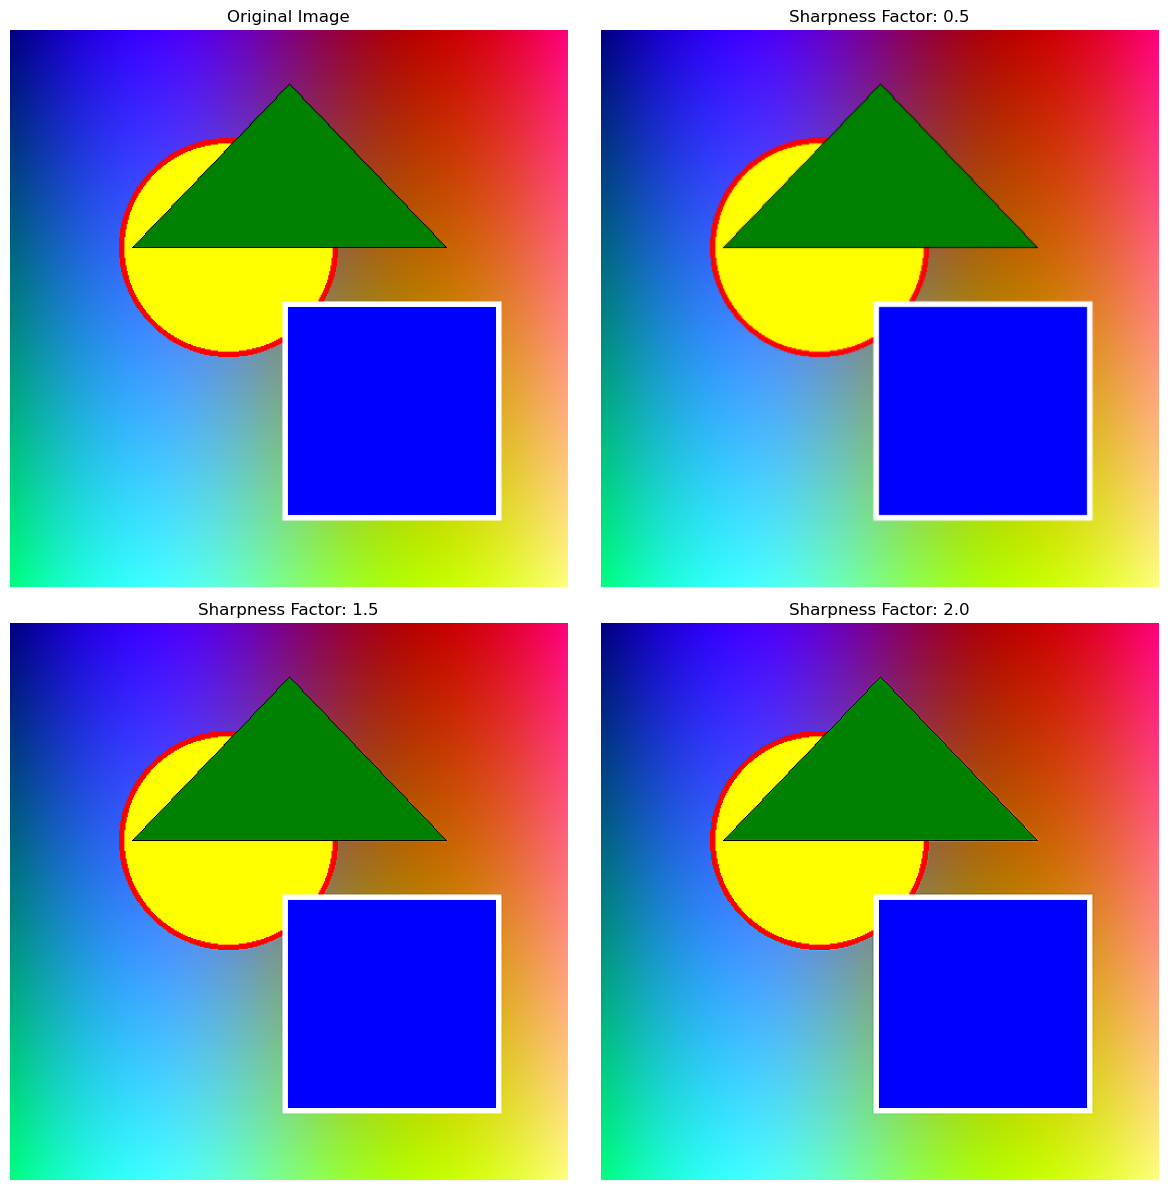

In [24]:
# Demonstrate sharpness enhancement
sharp_factors = [0.5, 1.5, 2.0]
sharp_images = [ImageEnhance.Sharpness(image).enhance(factor) for factor in sharp_factors]

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, (sharp_image, factor) in enumerate(zip(sharp_images, sharp_factors)):
    row = (i + 1) // 2
    col = (i + 1) % 2
    axes[row, col].imshow(sharp_image)
    axes[row, col].set_title(f'Sharpness Factor: {factor}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Optional: Interactive Enhancements with ipywidgets

This section demonstrates an interactive tool to experiment with multiple enhancement parameters simultaneously. This requires the `ipywidgets` library to be installed.

**Note:** This is an optional exploration tool for visual experimentation.

In [25]:
import ipywidgets as widgets
from IPython.display import display

def interactive_enhancements(brightness, contrast, color, sharpness):
    """Apply all enhancements and display the result."""
    # Start with the original image
    enhanced_image = image
    
    # Apply enhancements sequentially
    enhanced_image = ImageEnhance.Brightness(enhanced_image).enhance(brightness)
    enhanced_image = ImageEnhance.Contrast(enhanced_image).enhance(contrast)
    enhanced_image = ImageEnhance.Color(enhanced_image).enhance(color)
    enhanced_image = ImageEnhance.Sharpness(enhanced_image).enhance(sharpness)
    
    # Display the result
    plt.figure(figsize=(8, 8))
    plt.imshow(enhanced_image)
    plt.axis('off')
    plt.title(f'B:{brightness:.1f} C:{contrast:.1f} Col:{color:.1f} S:{sharpness:.1f}')
    plt.show()

# Create sliders for each enhancement
brightness_slider = widgets.FloatSlider(
    min=0.1, max=2.0, step=0.1, value=1.0, description='Brightness:'
)
contrast_slider = widgets.FloatSlider(
    min=0.1, max=2.0, step=0.1, value=1.0, description='Contrast:'
)
color_slider = widgets.FloatSlider(
    min=0.1, max=2.0, step=0.1, value=1.0, description='Color:'
)
sharpness_slider = widgets.FloatSlider(
    min=0.1, max=2.0, step=0.1, value=1.0, description='Sharpness:'
)

# Create interactive interface
widgets.interactive(
    interactive_enhancements, 
    brightness=brightness_slider, 
    contrast=contrast_slider, 
    color=color_slider, 
    sharpness=sharpness_slider
)

interactive(children=(FloatSlider(value=1.0, description='Brightness:', max=2.0, min=0.1), FloatSlider(value=1…

## Recap

This notebook covered the fundamentals of image manipulation using Pillow:

**Image Representation:**
- Pillow uses `Image` objects with attributes like `size`, `mode`, and `format`
- RGB images contain three color channels (Red, Green, Blue) with values 0-255
- Grayscale images use a single channel representing luminance
- Images can be converted to/from NumPy arrays for numerical operations

**Basic Transformations:**
- Rotating, flipping, and transposing for orientation changes
- Cropping to extract regions of interest
- Resizing with different quality filters (NEAREST, BILINEAR, BICUBIC, LANCZOS)

**Image Enhancements:**
- **Brightness**: adjusts overall light intensity
- **Contrast**: controls the difference between light and dark areas
- **Color**: modifies color saturation
- **Sharpness**: enhances edge definition and detail

These operations are commonly used for image preprocessing, data augmentation, and basic image correction in computer vision applications.